In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
#Load dataset
url = 'https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/master/USA_Housing.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [7]:
df=df.drop('Address',axis=1)

In [8]:
X=df.drop('Price',axis=1)
y=df['Price']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(X_test)

In [12]:
# evaluate
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Score:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 80879.0972348696
Mean Squared Error (MSE): 10089009300.89066
Root Mean Squared Error (RMSE): 100444.06055556824
R^2 Score: 0.9179971706834602


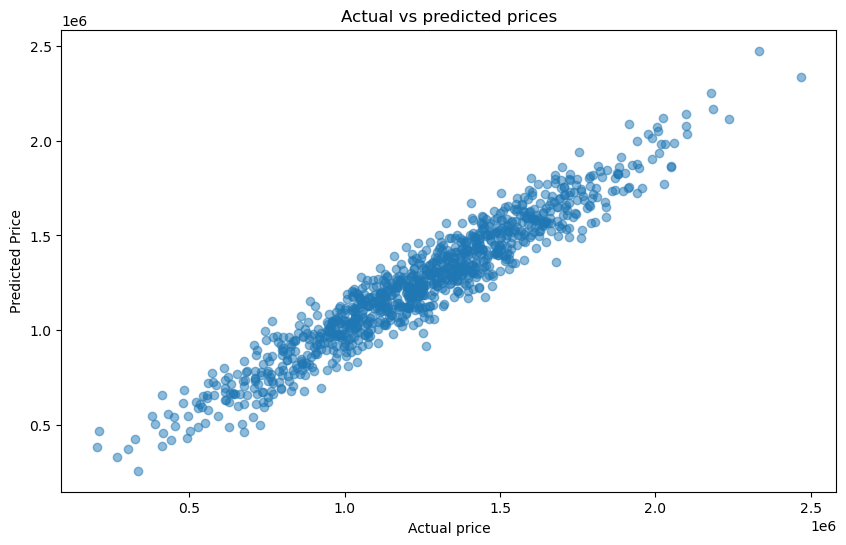

In [13]:
# visyualize
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs predicted prices')
plt.show()